In [21]:
!pip install matplotlib
!pip install scipy

In [22]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import os
import numpy as np
from scipy import stats


In [23]:
# Data Merging
#import the modules

# Directory containing CSV files
input_directory = ("../Project_1/Resources_Input")
# Output file path
output_file = ("../Project_1/Resources_Output/Crypto_merged.csv")

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(input_directory) if f.endswith('.csv')]

# List to hold DataFrames
dataframes = []

# Read each CSV file into a DataFrame
for file in csv_files:
    file_path = os.path.join(input_directory, file)
    df = pd.read_csv(file_path)
    # Convert the Date column to datetime64[ns]
    df['Date'] = pd.to_datetime(df['Date'])
    dataframes.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dataframes, ignore_index=True)

# Write the combined DataFrame to a new CSV file
merged_df.to_csv(output_file, index=False)

In [24]:
# Data Cleaning
merged_df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,28549.400391,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,20677.900391,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,23550.199219,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,26800.199219,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,22511.500000,2.598354e+06


In [25]:
target_symbols = [ 'BTC','ETH', 'ADA','BNB','XRP','SOL','DOGE']

filtered_df=merged_df[merged_df['Symbol'].isin(target_symbols)]
filtered_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
7970,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
7971,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
7972,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
7973,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
7974,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
36189,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
36190,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
36191,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
36192,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


In [26]:
# filtered_df.reset_index(drop=True,inplace=True)

In [27]:
filtered_df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [28]:
#filtered_df.info()

In [29]:
# filtered_df['Date'].value_counts().sort_values()

In [30]:
# filtered_df.loc[filtered_df['Date']==0]

In [31]:
# Filter Doge coin data set

DOGE_df=filtered_df[filtered_df['Symbol'] == 'DOGE'].reset_index()

DOGE_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,33434,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,33435,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,33436,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,33437,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,33438,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...,...
2755,36189,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,36190,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,36191,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,36192,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


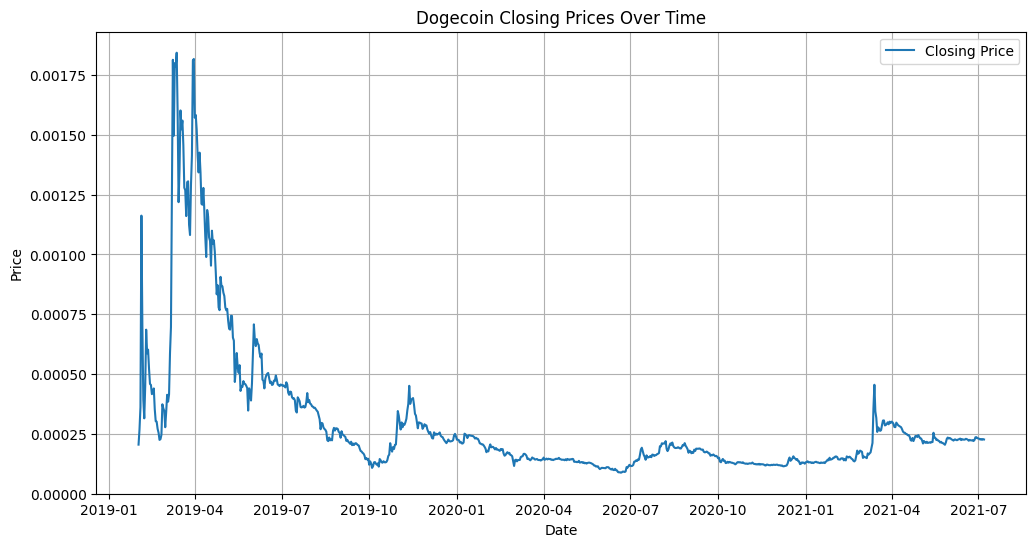

In [32]:
# Convert date column to datetime
DOGE_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
DOGE_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(DOGE_df['Close'], label='Closing Price')
plt.title('Dogecoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Filter Etherum data set

ETH_df=filtered_df[filtered_df['Symbol'] == 'ETH'].reset_index()

ETH_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,26420,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,26421,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,26422,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,26423,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,26424,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...,...
2155,28575,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,28576,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,28577,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,28578,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


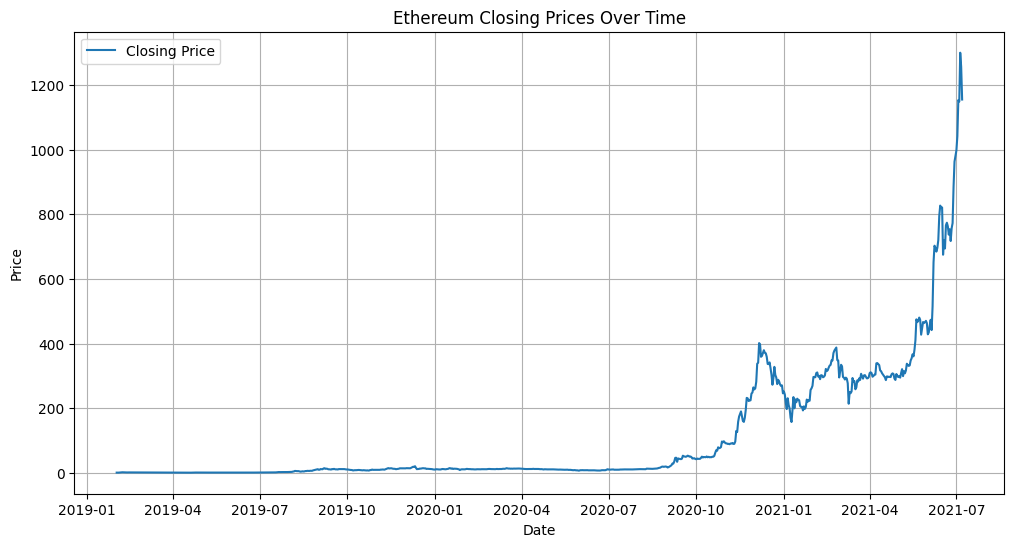

In [34]:
# Convert date column to datetime
ETH_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
ETH_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(ETH_df['Close'], label='Closing Price')
plt.title('Ethereum Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Filter Solana data set

SOL_df=filtered_df[filtered_df['Symbol'] == 'SOL'].reset_index()

SOL_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,11171,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.000000e+00
1,11172,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.000000e+00
2,11173,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.000000e+00
3,11174,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.000000e+00
4,11175,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
447,11618,448,Solana,SOL,2021-07-02 23:59:59,34.031786,31.479924,33.306310,34.020482,4.402988e+08,9.275257e+09
448,11619,449,Solana,SOL,2021-07-03 23:59:59,35.404770,33.298475,34.015575,34.478816,3.270200e+08,9.400216e+09
449,11620,450,Solana,SOL,2021-07-04 23:59:59,35.502372,33.555737,34.495117,34.310601,3.034205e+08,9.354354e+09
450,11621,451,Solana,SOL,2021-07-05 23:59:59,34.461824,32.482692,34.282550,32.984588,3.138393e+08,8.992833e+09


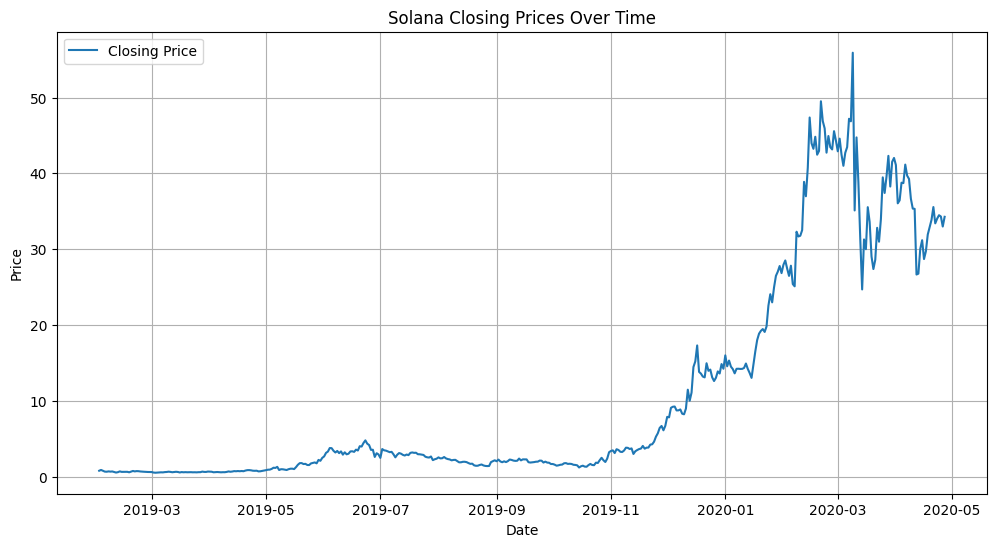

In [36]:
# Convert date column to datetime
SOL_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
SOL_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(SOL_df['Close'], label='Closing Price')
plt.title('Solana Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Filter Binance data set
BNB_df=filtered_df[filtered_df['Symbol'] == 'BNB'].reset_index()

BNB_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,7970,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,7971,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,7972,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,7973,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,7974,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...,...
1437,9407,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10
1438,9408,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10
1439,9409,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10
1440,9410,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10


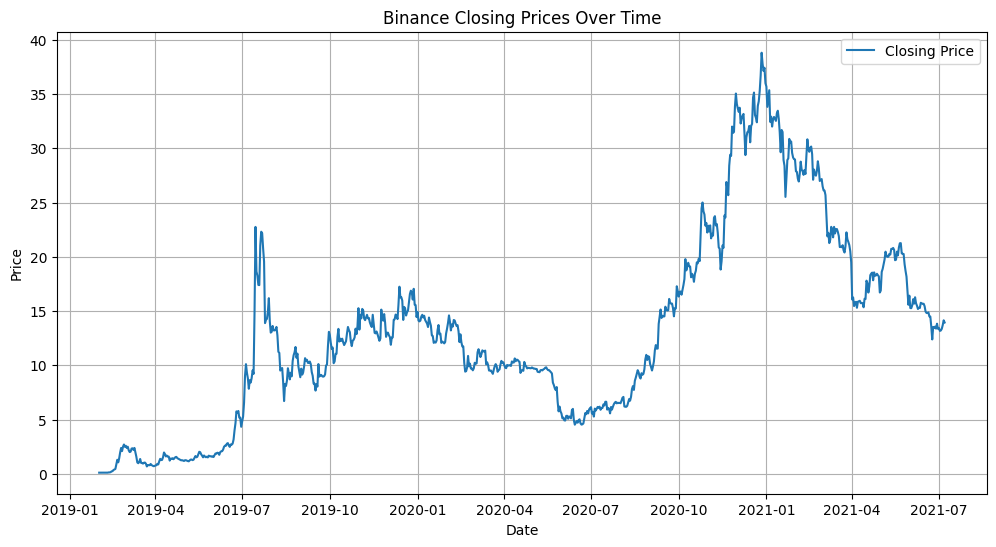

In [38]:
# Convert date column to datetime
BNB_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BNB_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BNB_df['Close'], label='Closing Price')
plt.title('Binance Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Filter BTC data set
BTC_df=filtered_df[filtered_df['Symbol'] == 'BTC'].reset_index()

BTC_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,11623,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,11624,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,11625,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,11626,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,11627,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...,...
2986,14609,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,14610,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,14611,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,14612,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


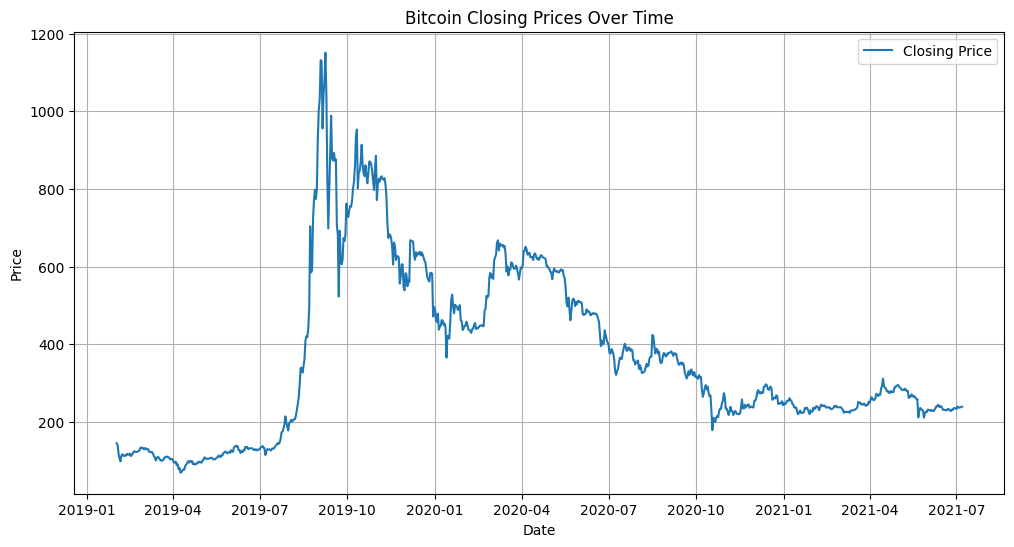

In [40]:
# Convert date column to datetime
BTC_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BTC_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BTC_df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_80000/1477262959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(df['Date'])


KeyError: 'Date'

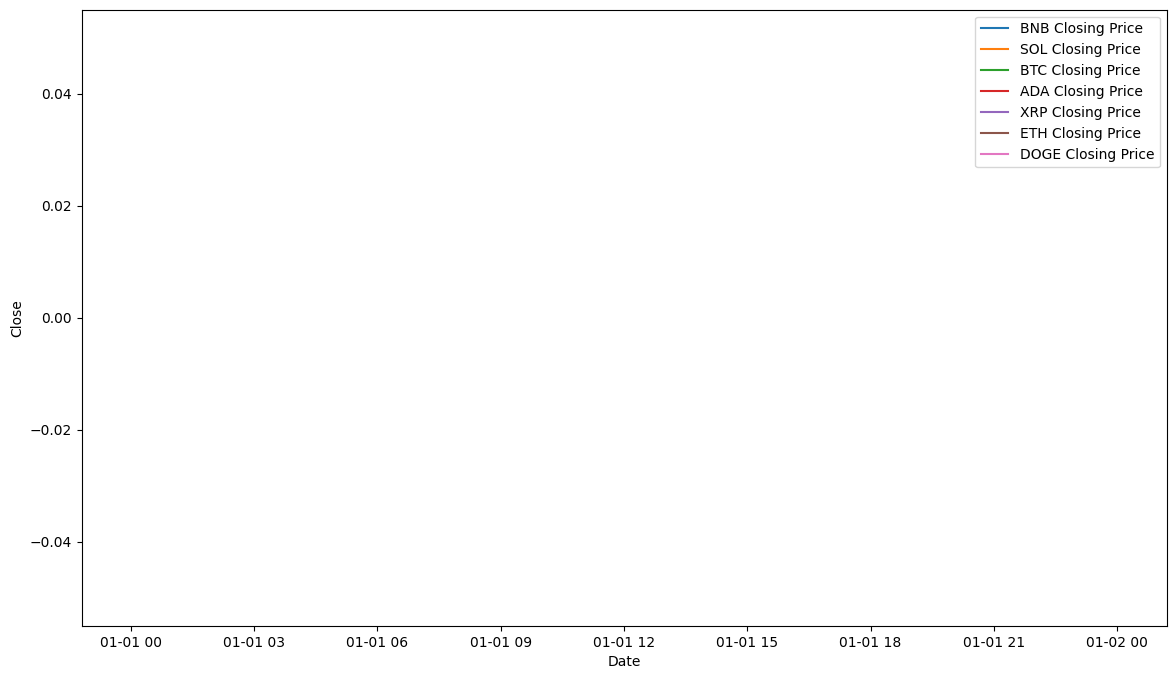

In [41]:
# filtered_df
# Ensure that 'Date' is in datetime format and set as the index

filtered_df['Date'] = pd.to_datetime(df['Date'])
filtered_df.set_index('Date', inplace=True)

plt.figure(figsize=(14, 8))
# Loop through each unique symbol and plot its data
for symbol in filtered_df['Symbol'].unique():
    crypto_data = filtered_df[filtered_df['Symbol'] == symbol]
    # Plot the closing price for each symbol
    sns.lineplot(x=crypto_data.index, y=crypto_data['Close'], label=f'{symbol} Closing Price')
# Add trendline
filtered_df['Date_ordinal'] = filtered_df['Date'].apply(lambda x: pd.to_datetime(x).toordinal())
# Calculate the slope, intercept, and plot the trendline for each symbol
for symbol in filtered_df['Symbol'].unique():
    crypto_data = filtered_df[filtered_df['Symbol'] == symbol]
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        crypto_data['Date_ordinal'], crypto_data['Close']
    )
    trendline = slope * filtered_df['Date_ordinal'] + intercept
    plt.plot(filtered_df.index, trendline, linestyle='--', color='red', label=f'{symbol} Trendline')
# Customize plot appearance
plt.title('Cryptocurrency Closing Price with Trendline')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()


In [ ]:
# Statistical functions  Mean, Median and Volatility compare few cyrpto (4-5)
#Calculate mean median and volatility of DogeCoin
mean_price = DOGE_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = DOGE_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
DOGE_df = DOGE_df.sort_values(by='Date')

# Calculate daily returns
DOGE_df['return'] = DOGE_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = DOGE_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 0.013762639322080604
Median Price: 0.00184435040268945
Volatility: 0.11345836448299737


In [ ]:
#Calculate mean median and volatility of Ethereum
mean_price = ETH_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = ETH_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
ETH_df = ETH_df.sort_values(by='Date')

# Calculate daily returns
ETH_df['return'] = ETH_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = ETH_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 383.91069131936325
Median Price: 198.64369149700002
Volatility: 0.06303562022503241


In [ ]:
#Calculate mean median and volatility of Solana
mean_price = SOL_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = SOL_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
SOL_df = SOL_df.sort_values(by='Date')

# Calculate daily returns
SOL_df['return'] = SOL_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = SOL_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 10.471388329287931
Median Price: 2.8813885885149997
Volatility: 0.09450721975387637


In [ ]:
#Calculate mean median and volatility of Binance
mean_price = BNB_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = BNB_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
BNB_df = BNB_df.sort_values(by='Date')

# Calculate daily returns
BNB_df['return'] = BNB_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = BNB_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 52.250307521403116
Median Price: 16.21056933625
Volatility: 0.08004986863144231


In [ ]:
#Calculate mean median and volatility of Bit Coin
mean_price = BTC_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = BTC_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
BTC_df = BTC_df.sort_values(by='Date')

# Calculate daily returns
BTC_df['return'] = BTC_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = BTC_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 6711.290443071488
Median Price: 2286.409912109375
Volatility: 0.04263924853868491


In [ ]:
# Correlation between trading volume and price movements

pd.to_datetime(BTC_df['Date'], format='%Y-%m-%d %H:%M')



KeyError: 'Date'

In [ ]:
DOGE_df['Date'] = pd.to_datetime(DOGE_df['Date'])
DOGE_df['Volume_change'] = DOGE_df['Volume'].pct_change() * 100
DOGE_df = DOGE_df.dropna()

print(DOGE_df)

Empty DataFrame
Columns: [index, SNo, Name, Symbol, High, Low, Open, Close, Volume, Marketcap, Date, Volume_change]
Index: []


In [ ]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 5.6 MB/s eta 

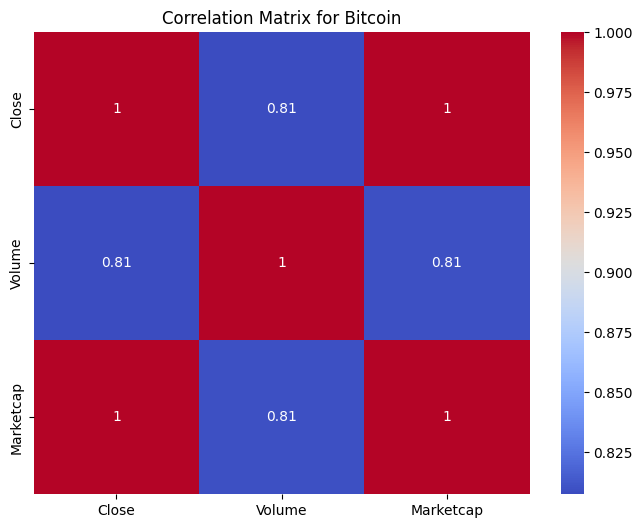

In [42]:
# Quant & Qual factors impacting cryptocurrency prices

# Quantitative Factors Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Filtered data for a specific cryptocurrency (e.g., Bitcoin)
btc_df = filtered_df[filtered_df['Symbol'] == 'BTC']

# Calculate correlation matrix
correlation_matrix = btc_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Bitcoin')
plt.show()

In [43]:
# Calculate daily returns
btc_df['Return'] = btc_df['Close'].pct_change()

# Calculate and plot volatility
btc_df['Volatility'] = btc_df['Return'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(btc_df['Date'], btc_df['Volatility'], label='30-day Rolling Volatility')
plt.title('Bitcoin Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_80000/2025173875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df['Return'] = btc_df['Close'].pct_change()
/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_80000/2025173875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df['Volatility'] = btc_df['Return'].rolling(window=30).std()


KeyError: 'Date'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Qualitative Factors Analysis

import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Example API request (using NewsAPI)
api_key = 'your_api_key'
url = f'https://newsapi.org/v2/everything?q=Bitcoin&apiKey={api_key}'
response = requests.get(url)
articles = response.json()['articles']

# Extract headlines
headlines = [article['title'] for article in articles]

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(headline)['compound'] for headline in headlines]

# Correlate sentiment with price
btc_df['Sentiment'] = sentiments  # Assuming you align dates correctly

In [ ]:
# Social Media Trends

# Fetch tweets using Twitter API (requires setup with credentials)
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("CONSUMER_KEY", "CONSUMER_SECRET")
auth.set_access_token("ACCESS_TOKEN", "ACCESS_SECRET")

# Create API object
api = tweepy.API(auth)

# Fetch tweets related to Bitcoin
tweets = api.search_tweets(q='Bitcoin', count=100)

# Perform sentiment analysis on tweets
tweet_sentiments = [analyzer.polarity_scores(tweet.text)['compound'] for tweet in tweets]

# Further analysis as needed

In [ ]:
# Combining Quantitative and Qualitative Analyses

from statsmodels.regression.linear_model import OLS

# Example: Combining volume and sentiment
btc_df['Combined'] = btc_df['Volume'] * btc_df['Sentiment']

# Multivariate regression model
model = OLS(btc_df['Close'], btc_df[['Volume', 'Sentiment', 'Combined']])
results = model.fit()

# View results
print(results.summary())

In [ ]:
# Change in Trading volume

In [ ]:
# Charts and graphs

In [ ]:
# Bonus # External event API

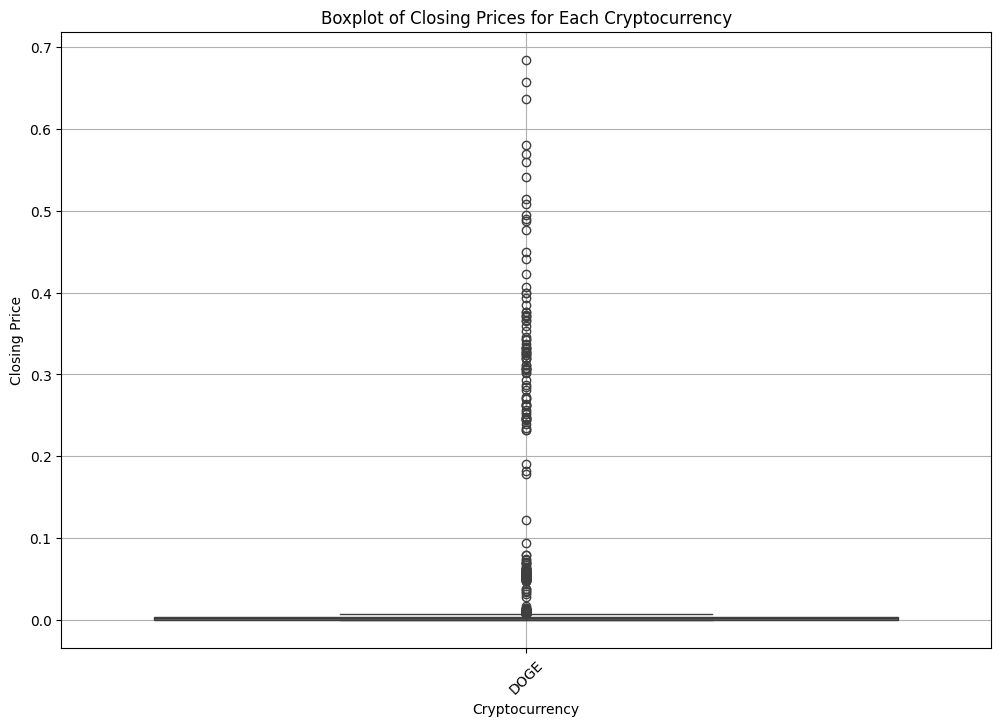

In [44]:
#boxplots
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already filtered your DataFrame to include only the target symbols
target_symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'XRP', 'SOL', 'DOGE']
filtered_df = crypto_data[crypto_data['Symbol'].isin(target_symbols)]

# Create a boxplot for each cryptocurrency's closing price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Symbol', y='Close', data=filtered_df)
plt.title('Boxplot of Closing Prices for Each Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

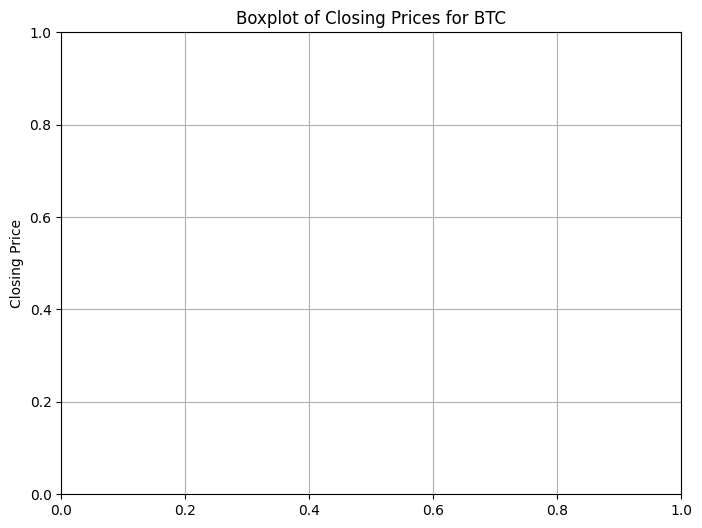

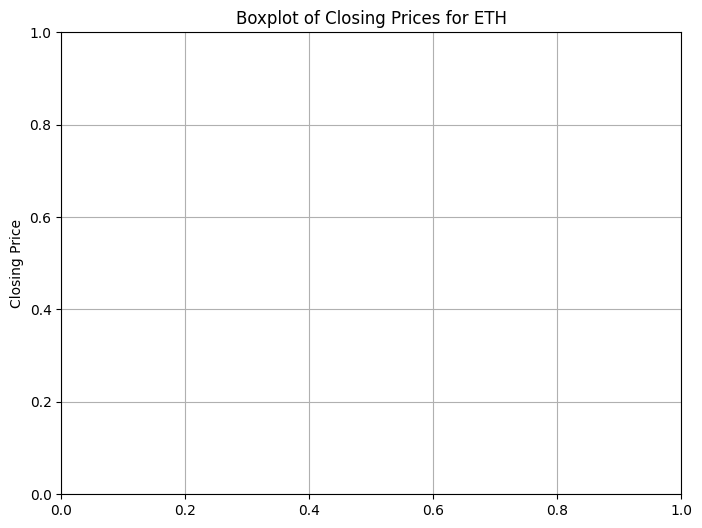

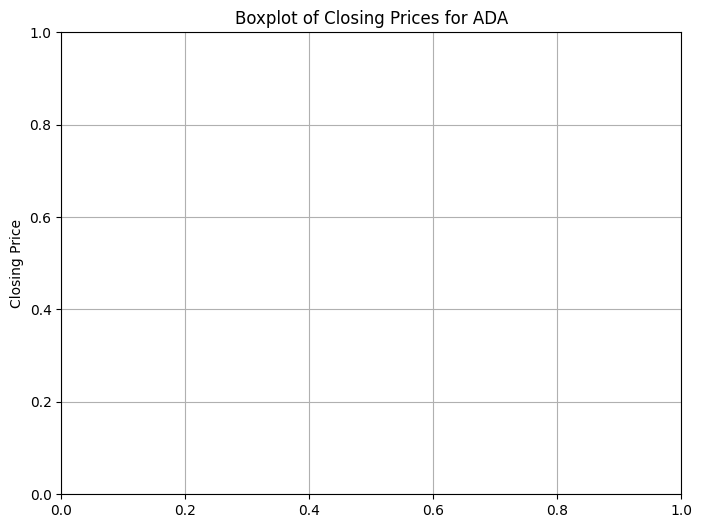

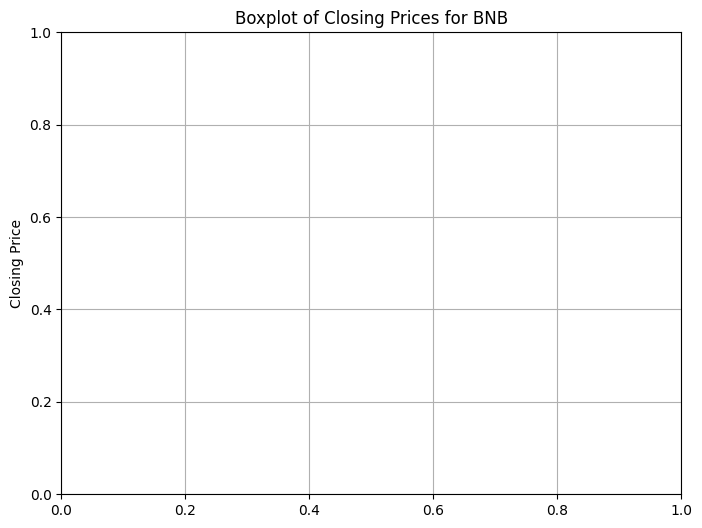

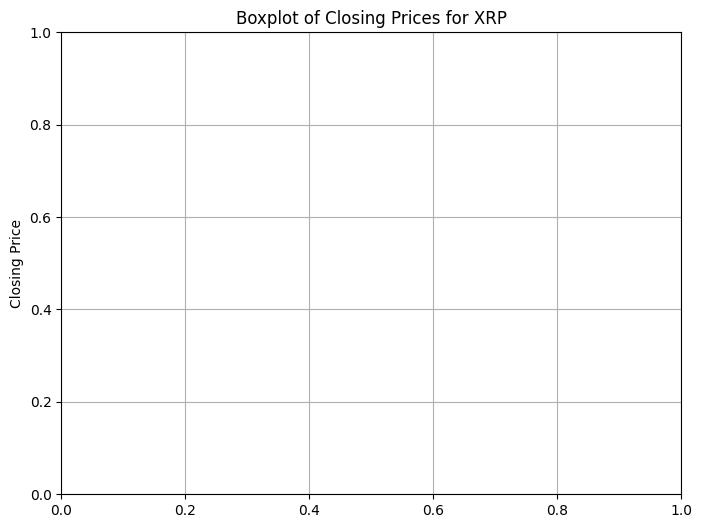

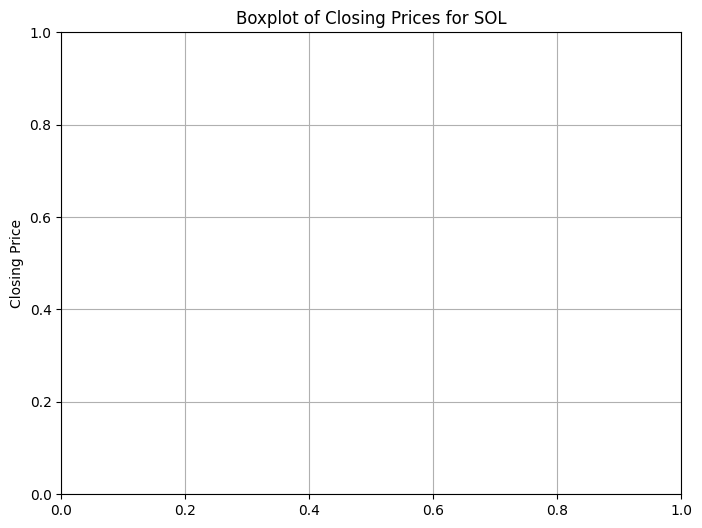

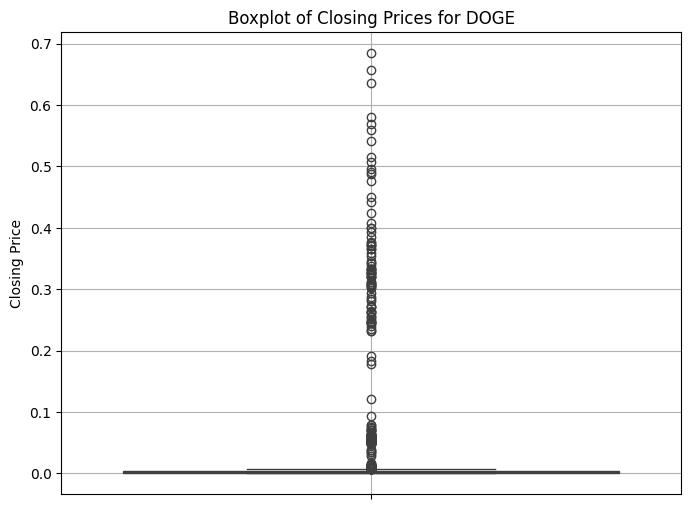

In [45]:
target_symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'XRP', 'SOL', 'DOGE']
filtered_df = crypto_data[crypto_data['Symbol'].isin(target_symbols)]

# Loop through each cryptocurrency and create a boxplot
for symbol in target_symbols:
    # Filter data for the specific cryptocurrency
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]
    
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y='Close', data=symbol_df)
    plt.title(f'Boxplot of Closing Prices for {symbol}')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

No data available for BTC
No data available for ETH
No data available for ADA
No data available for BNB
No data available for XRP
No data available for SOL


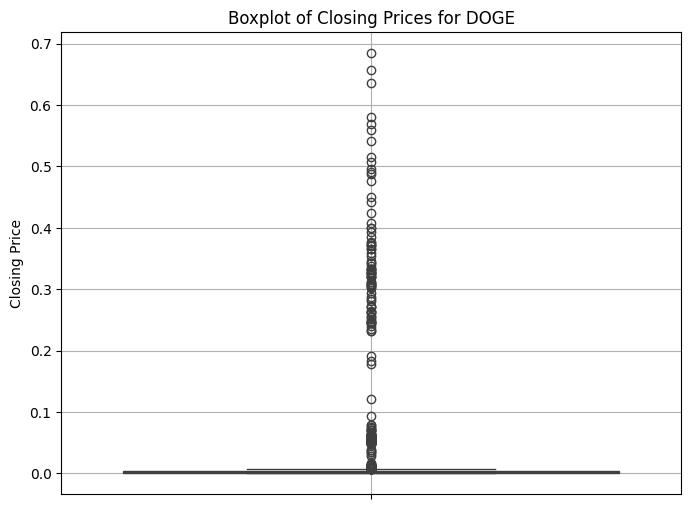

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already filtered your DataFrame to include only the target symbols
target_symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'XRP', 'SOL', 'DOGE']
filtered_df = crypto_data[crypto_data['Symbol'].isin(target_symbols)]

# Loop through each cryptocurrency and create a boxplot
for symbol in target_symbols:
    # Filter data for the specific cryptocurrency
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]
    
    # Check if the symbol_df is not empty
    if not symbol_df.empty:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y='Close', data=symbol_df)
        plt.title(f'Boxplot of Closing Prices for {symbol}')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {symbol}")

In [47]:
print(filtered_df['Symbol'].unique())

# Normalize symbol names
filtered_df['Symbol'] = filtered_df['Symbol'].str.strip().str.upper()

#Inspect the Data for Missing or Incorrect Entries
for symbol in target_symbols:
    symbol_data_count = filtered_df[filtered_df['Symbol'] == symbol].shape[0]
    print(f"{symbol}: {symbol_data_count} records")

# Reload original dataset
crypto_data = pd.read_csv('/mnt/data/Crypto_merged.csv')
crypto_data['Symbol'] = crypto_data['Symbol'].str.strip().str.upper()

# Apply filtering again
filtered_df = crypto_data[crypto_data['Symbol'].isin(target_symbols)]

# Debug by Inspecting Filtered Data

print(filtered_df.head(20))  # Print the first 20 rows to inspect

#Re-run the Boxplot Code
for symbol in target_symbols:
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]
    if not symbol_df.empty:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y='Close', data=symbol_df)
        plt.title(f'Boxplot of Closing Prices for {symbol}')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {symbol}") 




['DOGE']
BTC: 0 records
ETH: 0 records
ADA: 0 records
BNB: 0 records
XRP: 0 records
SOL: 0 records
DOGE: 2760 records


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Crypto_merged.csv'

['BNB' 'SOL' 'BTC' 'ADA' 'XRP' 'ETH' 'DOGE']


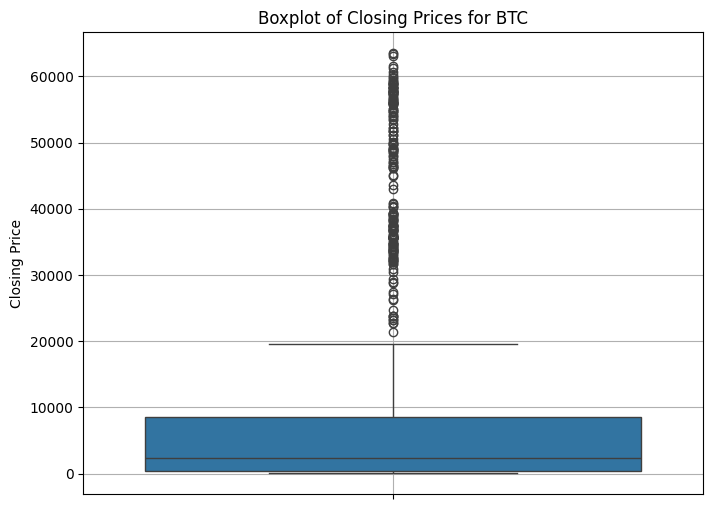

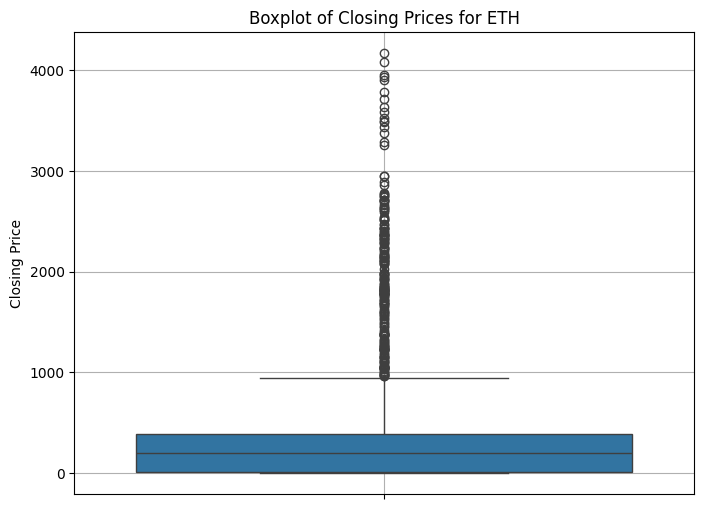

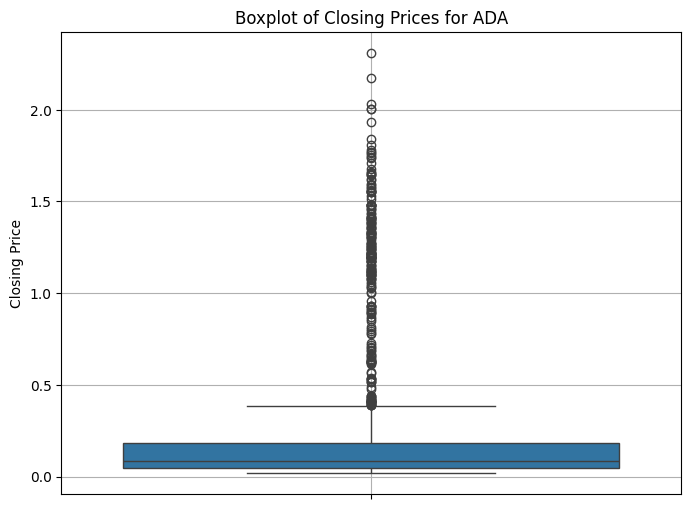

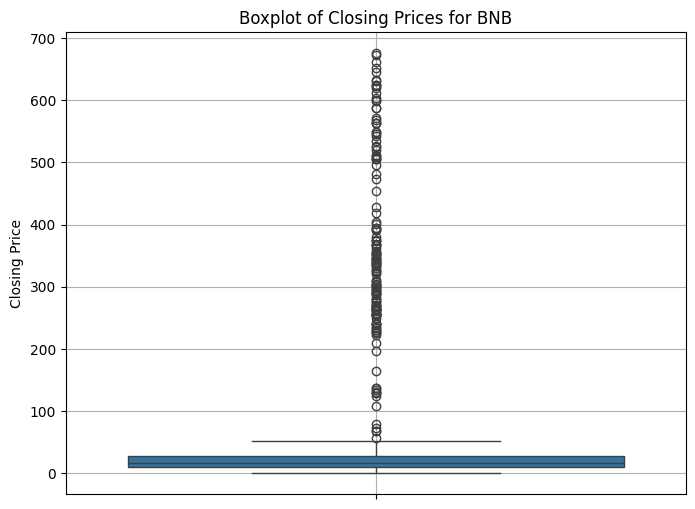

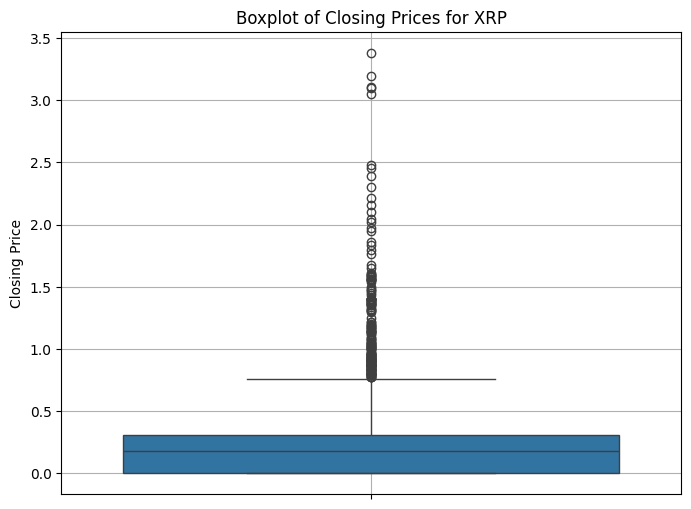

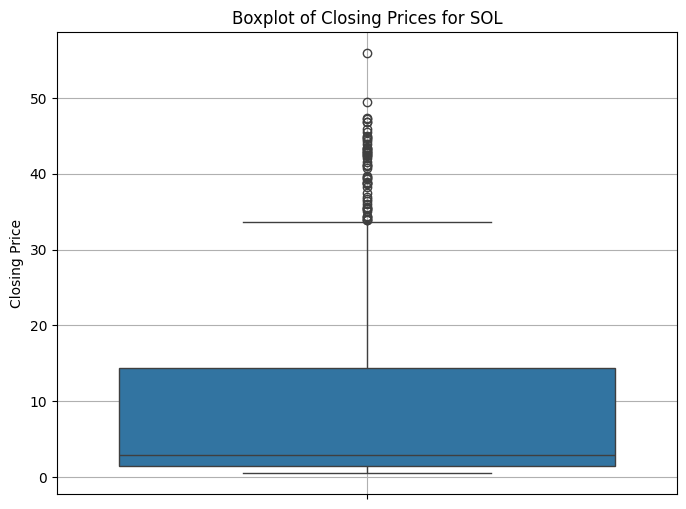

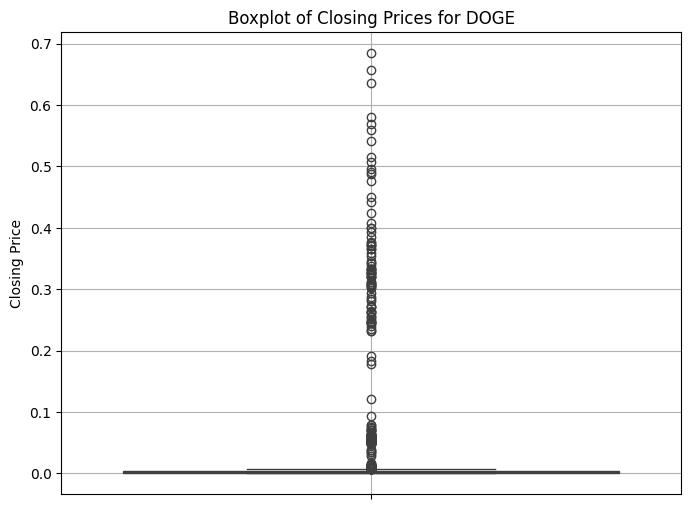

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the correct dataset
crypto_data = pd.read_csv("../Project_1/Resources_Output/Crypto_merged.csv")

# Convert 'Date' column to datetime (if not already done)
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])

# Normalize symbol names to ensure consistency
crypto_data['Symbol'] = crypto_data['Symbol'].str.strip().str.upper()

# Define the target symbols
target_symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'XRP', 'SOL', 'DOGE']

# Filter the DataFrame to include only the target symbols
filtered_df = crypto_data[crypto_data['Symbol'].isin(target_symbols)]

# Verify the unique symbols in the filtered DataFrame
print(filtered_df['Symbol'].unique())

# Loop through each cryptocurrency and create a boxplot
for symbol in target_symbols:
    # Filter data for the specific cryptocurrency
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]
    
    # Check if the symbol_df is not empty
    if not symbol_df.empty:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y='Close', data=symbol_df)
        plt.title(f'Boxplot of Closing Prices for {symbol}')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {symbol}")